<a href="https://colab.research.google.com/github/AlejandraST29/ARDUINOCAM/blob/main/regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn as sk
%matplotlib inline

In [ ]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

Ajuste del modelo de regresión simple

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x, y)

LinearRegression()

Otra forma de ajustar un modelo

In [ ]:
model = LinearRegression().fit(x, y)

# Resultados

In [ ]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 5.633333333333329
slope: [0.54]


In [ ]:
import statsmodels.api as sm

In [ ]:
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()

In [ ]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     10.08
Date:                Mon, 10 Apr 2023   Prob (F-statistic):             0.0337
Time:                        18:09:48   Log-Likelihood:                -19.071
No. Observations:                   6   AIC:                             42.14
Df Residuals:                       4   BIC:                             41.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6333      5.872      0.959      0.3

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# Pronósticos

In [ ]:
y_pred = model.predict(x)

In [ ]:
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

# Otro Ejemplo

In [ ]:
# Load CSV and columns
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Housing.csv")
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [ ]:
df.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


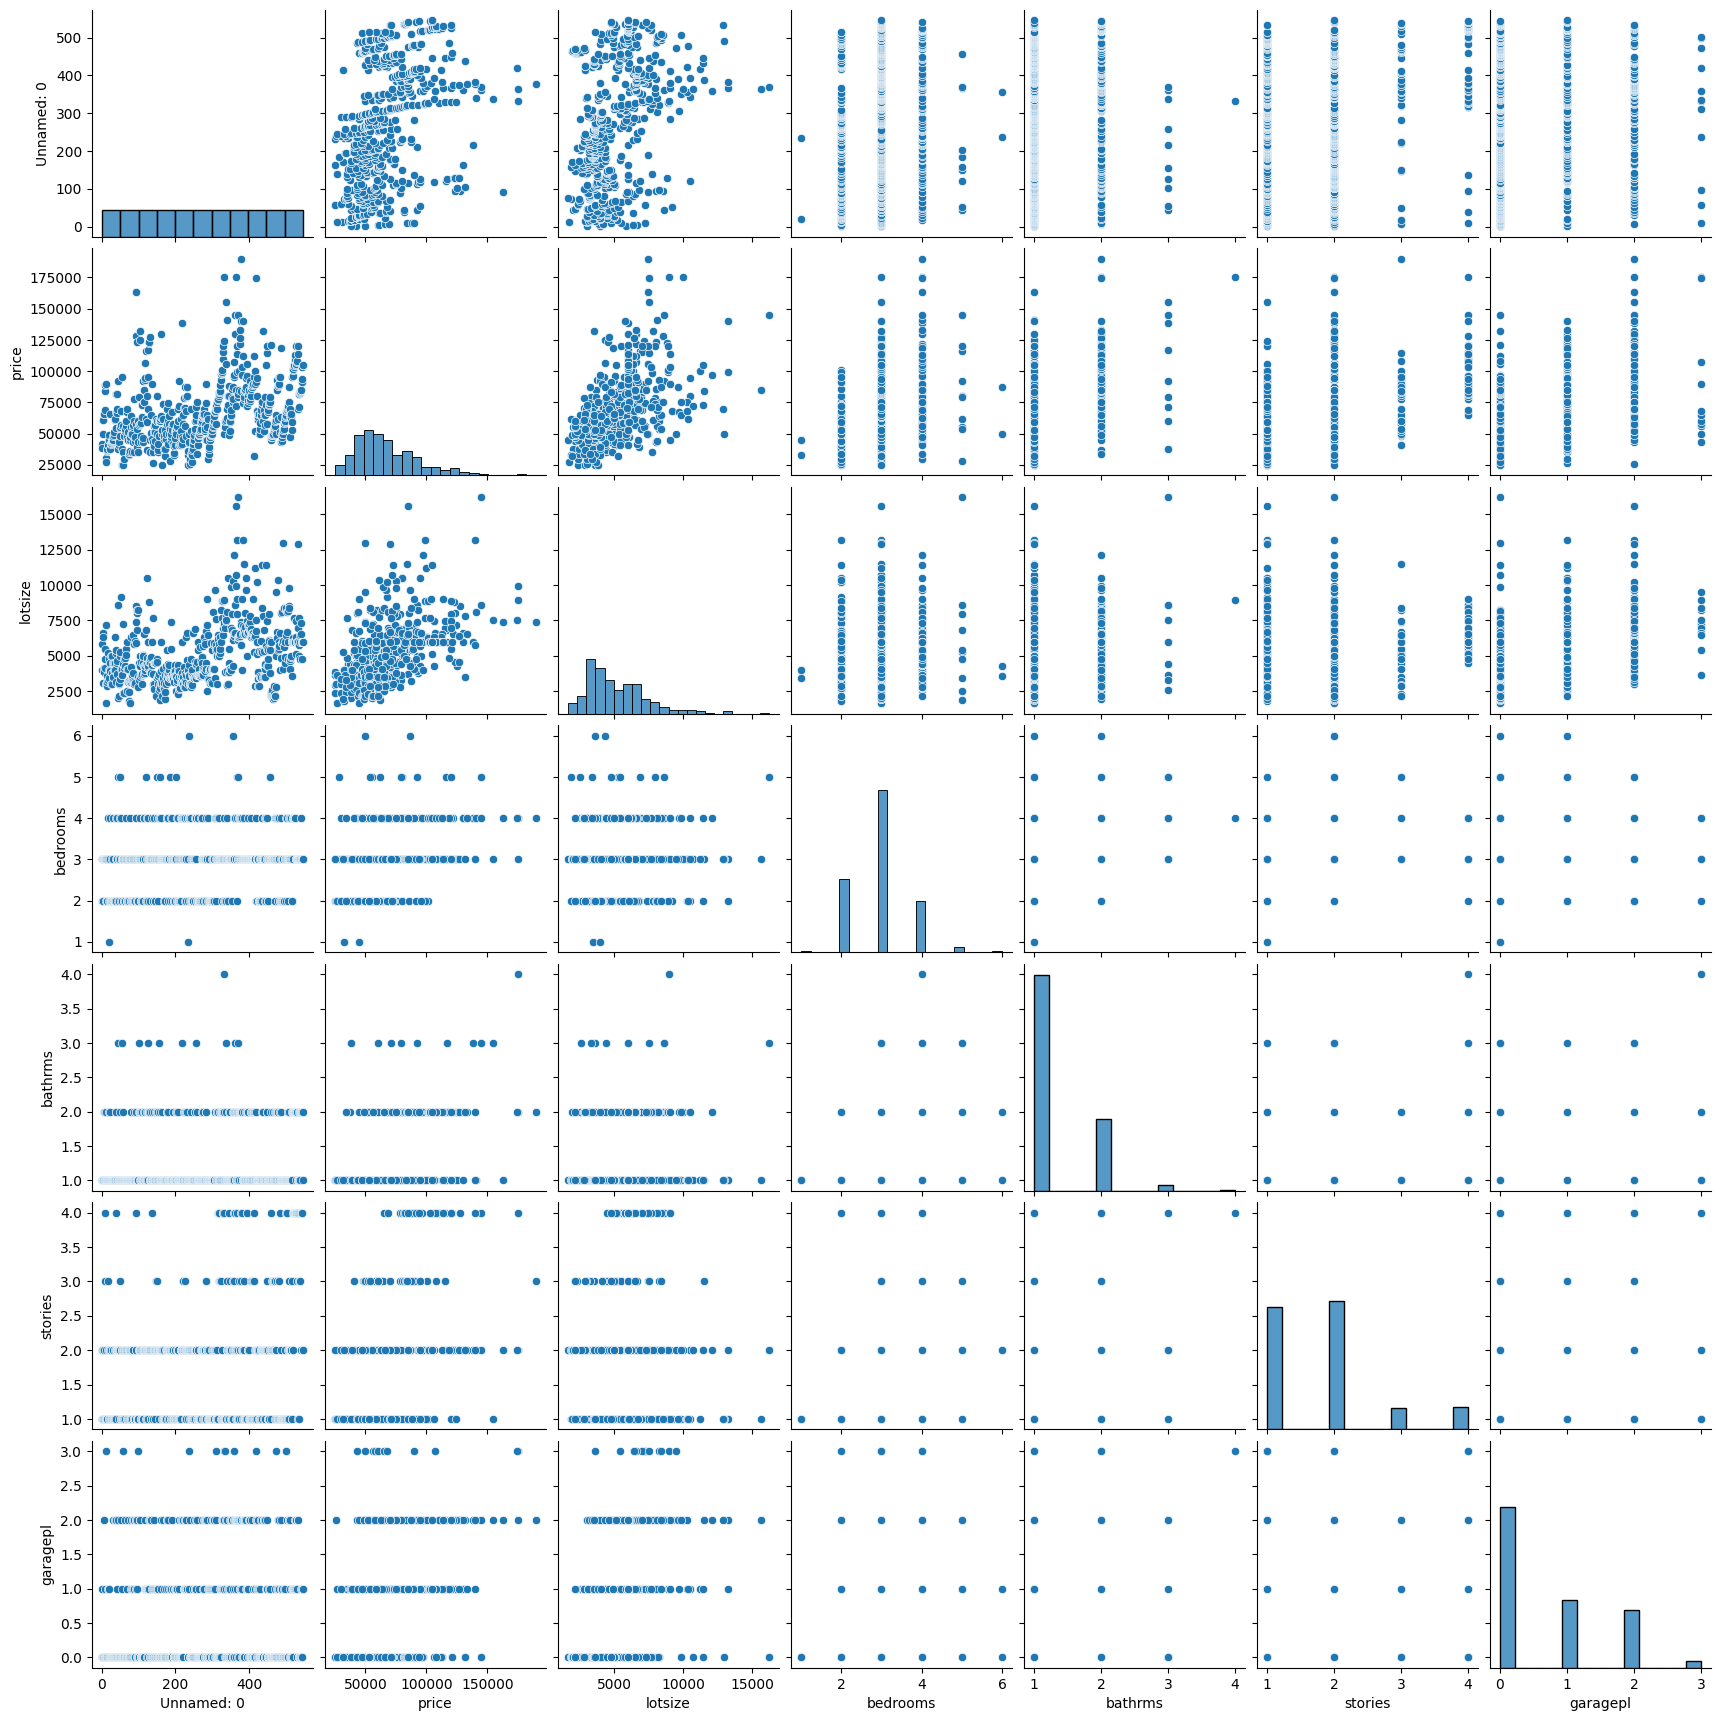

In [ ]:
sns.pairplot(df)

Regresión lineal simple sólo utilizando lotsize

In [ ]:
y = df['price']
x = df['lotsize']
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)


Separación de muestra de entrenamiento y validación

In [ ]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size = 0.3)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_)
print(model.intercept_)


[[6.47409357]]
[35377.34783943]


In [ ]:
x2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x2)
est2 = est.fit()

In [ ]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     150.7
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           2.08e-29
Time:                        18:11:34   Log-Likelihood:                -4382.5
No. Observations:                 382   AIC:                             8769.
Df Residuals:                     380   BIC:                             8777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.538e+04   2963.895     11.936      0.0

In [ ]:
predictions = model.predict(x_test)

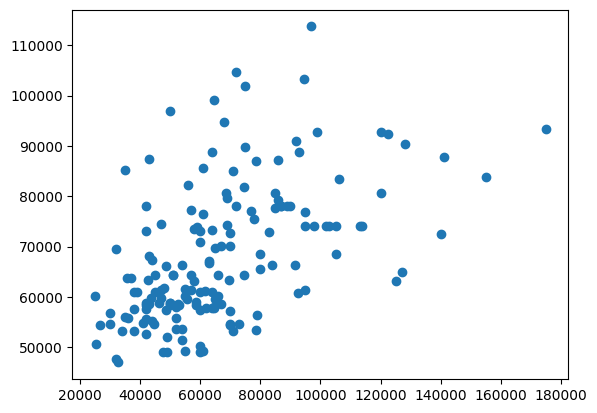

In [ ]:
plt.scatter(y_test, predictions)

(array([ 4., 18., 40., 44., 30., 13.,  9.,  1.,  3.,  2.]),
 array([-50146.36341248, -36966.83458075, -23787.30574902, -10607.77691729,
          2571.75191445,  15751.28074618,  28930.80957791,  42110.33840964,
         55289.86724138,  68469.39607311,  81648.92490484]),
 <BarContainer object of 10 artists>)

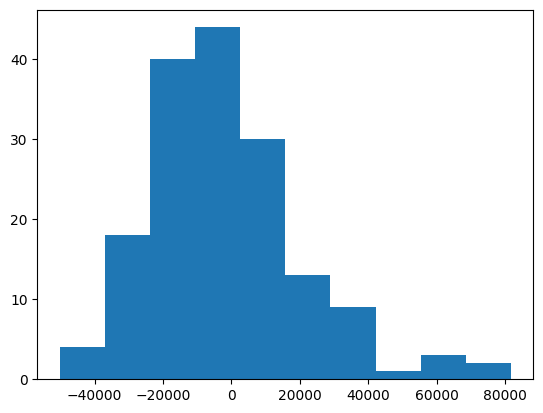

In [ ]:
plt.hist(y_test - predictions)


#Desempeño del modelo

In [ ]:
sk.metrics.mean_absolute_error(y_test, predictions)

17002.717947583737

In [ ]:
sk.metrics.mean_squared_error(y_test, predictions)


502452460.3322769

In [ ]:
#Root Mean Square Error
np.sqrt(sk.metrics.mean_squared_error(y_test, predictions))

22415.451374716435